# Develelopment of Normalization

In [1]:
%matplotlib notebook
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import ompy as om
plt.style.use('Solarize_Light2')

In [3]:
# find_norm
Sn = 6.271  # 163Dy
#Sn = 7.658  # 164Dy

pnld_norm = {
    "E1_low": 0.,
    "E2_low": 1.,
    "E1_high": 2.5,
    "E2_high": 4.5,
    "nld_Sn": np.array([4.5, 1.33e6])
}
pnld_ext = {
    "ext_range": np.array([3.5,8.]) # extrapolation range
}
fname_discretes = "data/discrete_levels.txt"

pspin = {}

## normalization of the gsf
# choose a spincut model and give it's parameters
#pspin["spincutModel"]="EB05"
#pspin["spincutPars"]={"mass":164, "NLDa":17.75, "Eshift":0.38} # some dummy values
pspin["spincutModel"]="Disc_and_EB05"
pspin["spincutPars"]={"mass":163, "NLDa":17.31, "Eshift":-0.84,
                      "Sn":Sn, "sigma2_disc":[1.5,3.3]}

# input parameters:
# Emid_Eg, rho_in, T_in in MeV, MeV^-1, 1
# J_target in 1
# D0 in eV
# Gg in meV
# Sn in MeV
pspin["J_target"] = 0
pspin["Gg"] = [112.,20.] # meV
pspin["Sn"] = Sn # MeV
D0 = np.array([62.,5.]) # eV, format:[mean, std] (of the A-1 nucleus(!))

#for i in range(extractor.size):
#    extractor.nld[i].E /= 1000
#    extractor.gsf[i].E /= 1000
#nld = np.c_[extractor.nld[0].E, extractor.nld_mean(), extractor.nld_std()]
#d = np.column_stack([extractor.nld[0].E, extractor.nld_mean(), extractor.nld_std()])
# Bounds for differential evolution
# A, alpha, T
pnld_norm["bounds_diff_evo"] = [(1, 100), # A
                                (1e-3, 5e-3), # alpha
                                (0.1, 1), # T
                                (D0[0]*0.99,D0[0]*1.01)] #D0


In [ ]:
normNLD = om.NormNLD(nld=nld,
                     method="find_norm", pnorm=pnld_norm,
                     nldModel="CT", pext=pnld_ext,
                     D0 = D0,
                     pspin=pspin,
                     fname_discretes=fname_discretes )

nld_fit = normNLD.nld_norm
nld_ext = normNLD.nld_ext
A_norm = normNLD.A_norm
alpha_norm = normNLD.alpha_norm
discretes = normNLD.discretes
multinest_samples = normNLD.multinest_samples

In [ ]:
fig, ax = extractor.plot()
E = extractor.nld[0].E
histsmooth, hist = om.get_discretes(E, 'data/discrete_levels.txt')
ax[0].plot(E, histsmooth)

import copy
extractor2 = copy.deepcopy(extractor)
om.Action('vector').transform(A_norm, alpha_norm).map(extractor2.nld)
extractor2.plot(ax=ax)

In [5]:
logger = om.introspection.getLogger("normalizer", "DEBUG")
extractor = om.Extractor(path='extraction_ensemble')
nld = extractor.ensemble_nld()
nld.E /= 1e3
discrete = om.load_levels_smooth('data/discrete_levels.txt', nld.E)
Sn = 6.271
normalizer = om.Normalizer(discrete=discrete, nld=nld)
normalizer.spin['spincutPars'] = {"mass":163, "NLDa":17.31, "Eshift":-0.84,
                      "Sn":Sn, "sigma2_disc":[1.5,3.3]}
normalizer.spin['J_target'] = 0
normalizer.spin['Gg'] = [112, 20]
normalizer.spin['Sn'] = Sn
normalizer.D0 = [62, 5]
normalizer.normalize([0, 1], [2.5, 4.5])

2019-09-26 16:59:11,274 - ompy.normalizer - DEBUG - Set `discrete` by Vector
2019-09-26 16:59:11,275 - ompy.normalizer - DEBUG - Created Normalizer
2019-09-26 16:59:11,317 - ompy.normalizer - DEBUG - Using bounds [(1, 100), (0.01, 0.005), (0.1, 1), (61.38, 62.62)]
2019-09-26 16:59:11,318 - ompy.normalizer - DEBUG - Using spin {
    "Gg": [
        112,
        20
    ],
    "J_target": 0,
    "Sn": 6.271,
    "spincutModel": "Disc_and_EB05",
    "spincutPars": {
        "Eshift": -0.84,
        "NLDa": 17.31,
        "Sn": 6.271,
        "mass": 163,
        "sigma2_disc": [
            1.5,
            3.3
        ]
    }
}
2019-09-26 16:59:11,503 - ompy.normalizer - INFO - DE results:
┌───────────────────┬──────────────────────┬───────────────────┬──────────────────┐
│ constant          │ α                    │ T                 │ D₀               │
╞═══════════════════╪══════════════════════╪═══════════════════╪══════════════════╡
│ 68.57303939173408 │ 0.008651664295396145 │ 0.23045

({'A': (69.55971075458689, 0.44820639017882513),
  'alpha': (0.08276487972067643, 0.0012027469068432925),
  'T': (0.24883102412412245, 0.0005276334765354496),
  'D0': (76.89919616497545, 5.987764619463519)},
 {'A': array([68.87255766, 68.6401033 , 68.81902364, ..., 69.54342537,
         69.55389756, 69.5410647 ]),
  'alpha': array([0.08076977, 0.07795229, 0.08562447, ..., 0.08257931, 0.08255076,
         0.08248946]),
  'T': array([0.24400855, 0.24569392, 0.24684672, ..., 0.24890562, 0.24891579,
         0.24890154]),
  'D0': array([66.48758562, 66.14356162, 64.55686645, ..., 79.50963549,
         79.48079746, 79.65403628])})

<IPython.core.display.Javascript object>


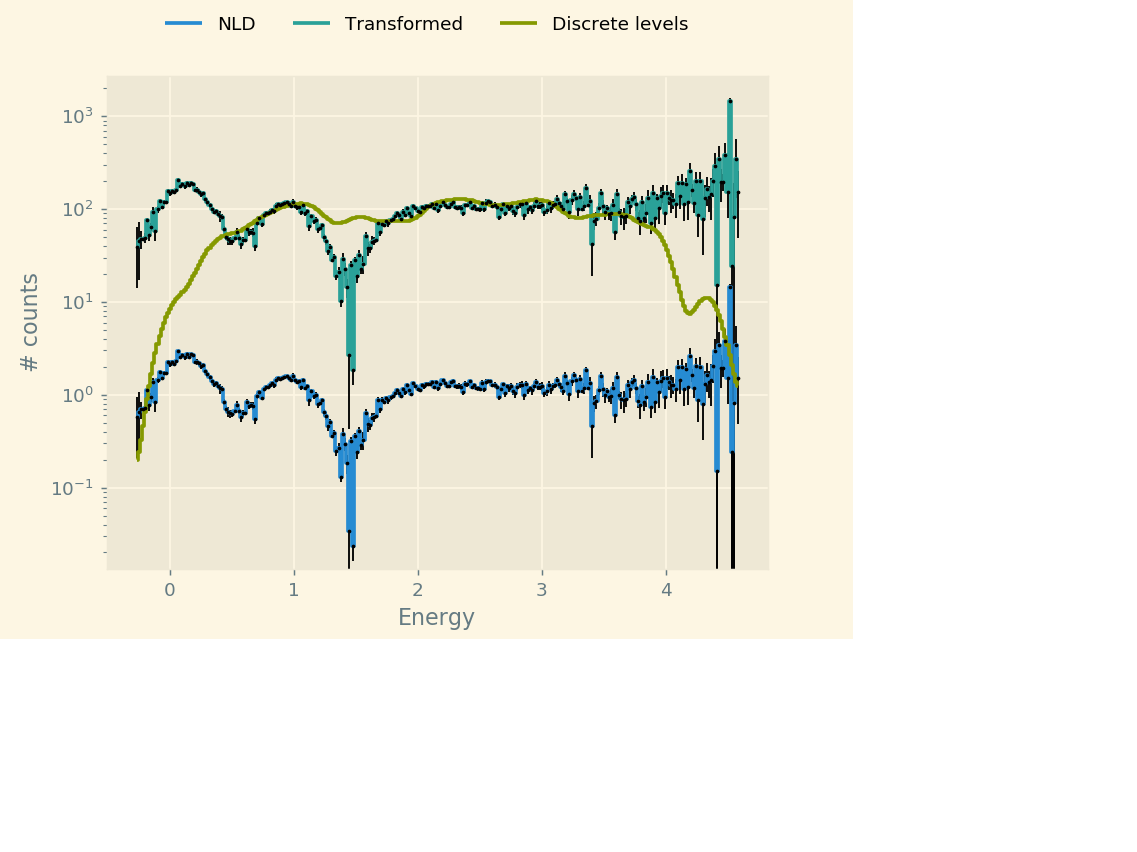

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f93383de790>)

In [6]:
normalizer.plot()

### TODO
- Design of normalization
  - Needs to accept both vectors and Extractors
  - Follow same design as previous
- [x] Implement bare bones nld normalization
- [x] Make it easy to load and manipulate discrete levels
- [x] Write tests for the properties of Normalizer
- St. Nimmleins Tag: Fix * exports in __init__
  - Contaminated logging so some star imports are fixed
- Should std be a separate matrix/vector from the values? Discuss
  - Is combined with vector
- Uncertain whether or not smoothing of discrete levels is necessary
  - Need to run tests and think harder
- [x] Move hooks to reflection
  - Rename to introspection